## Access Obs4MIPs and CMIP data via ESGF

On the ESGF webpage (https://esgf.github.io/software.html), [intake-esgf](https://github.com/esgf2-us/intake-esgf) is recommended. An example is shown below how to access data.

In [1]:
from intake_esgf import ESGFCatalog, supported_projects

In [2]:
supported_projects()

['cmip6', 'cmip5', 'cmip3', 'obs4mips', 'drcdp']

---
### Access CMIP

In this section we show an example how to access data from CMIP6. 

In [7]:
cat = ESGFCatalog()

In [8]:
cat.search(
    mip_era="cmip6",
    variable_id="tas",
    experiment_id="historical",
    source_id="CanESM5",
    member_id="r1i1p1f1",
    table_id="Amon",
)

   Searching indices:   0%|          |0/2 [       ?index/s]

Summary information for 1 results:
mip_era                [CMIP6]
activity_drs            [CMIP]
institution_id         [CCCma]
source_id            [CanESM5]
experiment_id     [historical]
member_id           [r1i1p1f1]
table_id                [Amon]
variable_id              [tas]
grid_label                [gn]
dtype: object

In [10]:
dsd = cat.to_dataset_dict()

Get file information:   0%|          |0/2 [       ?index/s]

Adding cell measures:   0%|          |0/1 [     ?dataset/s]

In [11]:
dsd["tas"]

<xarray.Dataset> Size: 65MB
Dimensions:    (time: 1980, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    tas        (time, lat, lon) float32 65MB ...
    areacella  (lat, lon) float32 33kB ...
Attributes: (12/55)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    variant_label:               r1i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0
    activity_drs:                CMIP
    member_id:                   r1i1p1f1

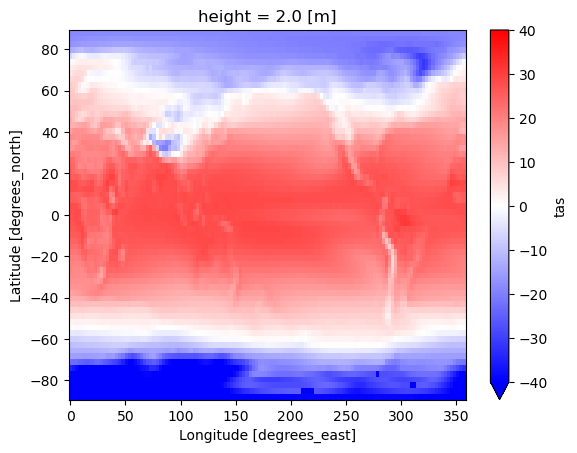

In [13]:
ds_plot = dsd["tas"]["tas"].mean(dim="time") - 273.15  # to [C]
ds_plot.plot(cmap="bwr", vmin=-40, vmax=40)

---
### Access OBS4MIPS

In this section we show an example how to access data from OBS4MIPS. 

In [21]:
cat = ESGFCatalog()

In [28]:
cat.search()

   Searching indices:   0%|          |0/2 [       ?index/s]

Summary information for 20000 results:
mip_era                                                     [CMIP6]
activity_drs              [PAMIP, DCPP, DAMIP, ScenarioMIP, VolMIP]
institution_id    [NCC, IPSL, MPI-M, BCC, NCAR, CCCma, NOAA-GFDL...
source_id         [NorESM2-LM, IPSL-CM6A-LR, MPI-ESM1-2-HR, BCC-...
experiment_id     [pdSST-futAntSIC, pdSST-futArcSIC, pdSST-piAnt...
member_id         [r77i1p1f1, r10i1p1f1, r75i1p1f1, r9i1p1f1, r3...
table_id          [EmonZ, Emon, CFmon, Amon, Lmon, AERmon, LImon...
variable_id       [vtem, cltmodis, fNgasFire, nLand, cSoil, clim...
grid_label                              [gn, gm, gr, grz, gr1, gnz]
dtype: object

In [32]:
cat = ESGFCatalog()

In [33]:
# List available datasets for the "obs4mips" project
cat.search(project="obs4mips")

   Searching indices:   0%|          |0/2 [       ?index/s]

NoSearchResults: 

In [34]:
cat.search(mip_era="obs4mips", experiment_id="historical")

   Searching indices:   0%|          |0/2 [       ?index/s]

NoSearchResults: 

In [30]:
cat.search(project="OBS4MIPS")

   Searching indices:   0%|          |0/2 [       ?index/s]

NoSearchResults: 

In [ ]:
dsd = cat.to_dataset_dict()

In [ ]:
dsd["tas"]

In [ ]:
ds_plot = dsd["tas"]["tas"].mean(dim="time") - 273.15  # to [C]
ds_plot.plot(cmap="bwr", vmin=-40, vmax=40)